## 1  - Univariate analysis 

In [2]:
# Libraries needed  at this stage 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
CC_df = pd.read_excel('Credit Card Customer Data.xlsx')

In [4]:
CC_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
CC_df.shape

(660, 7)

In [6]:
CC_df.info()
# Great : no null values and all columns are numerical !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
CC_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [ ]:
# Outlier and skewness : mean > or < median .
# Mostly with : Avg_Credit_Limit !

In [36]:
# drop the columns :  'SI_no'  and 'Customer Key'.
# as they do not hold information of customer types
X = CC_df.drop( ['Sl_No','Customer Key'], axis =1 )


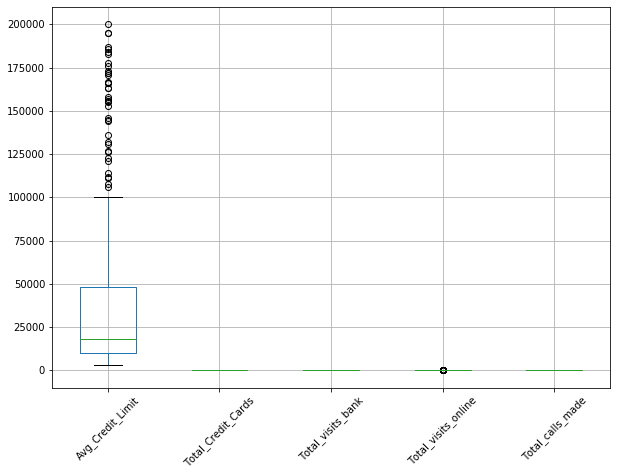

In [37]:
# Graphical representation 
X.boxplot(figsize=(10 , 7), rot=45)

# Confimration : Avg_Credit_Limit has MANY outliers 
# Reliasation :  The need of Rescaling is very OBVIOUS too .

# 2 - Re-scaling the Data and performing Bi-variate Analysis

In [39]:
# Library needed for rescaling 
from scipy import stats
from scipy.stats import zscore

In [40]:
X_scaled = X.apply(zscore)

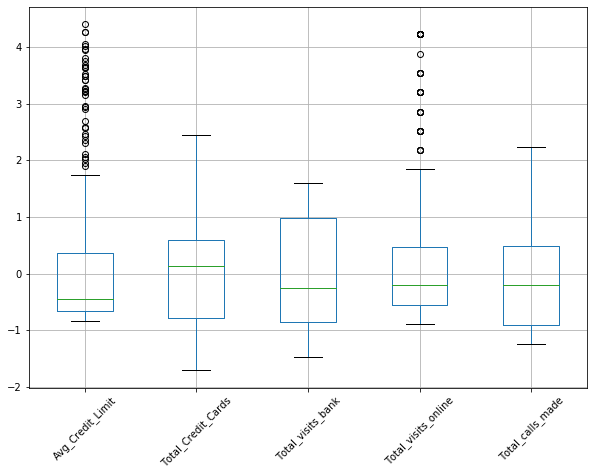

In [41]:
X_scaled.boxplot(figsize=(10 , 7), rot=45)

In [ ]:
# REMARK : 
# Inititially I had trimmed from the X_scaled dataframe all values beyond 3 Standard deviiations form their means.
# But After consideration : I thought those customers with extreme values could be a NICHE or CLUSTER! SO I kept them 

In [47]:
X_scaled.shape

(660, 5)

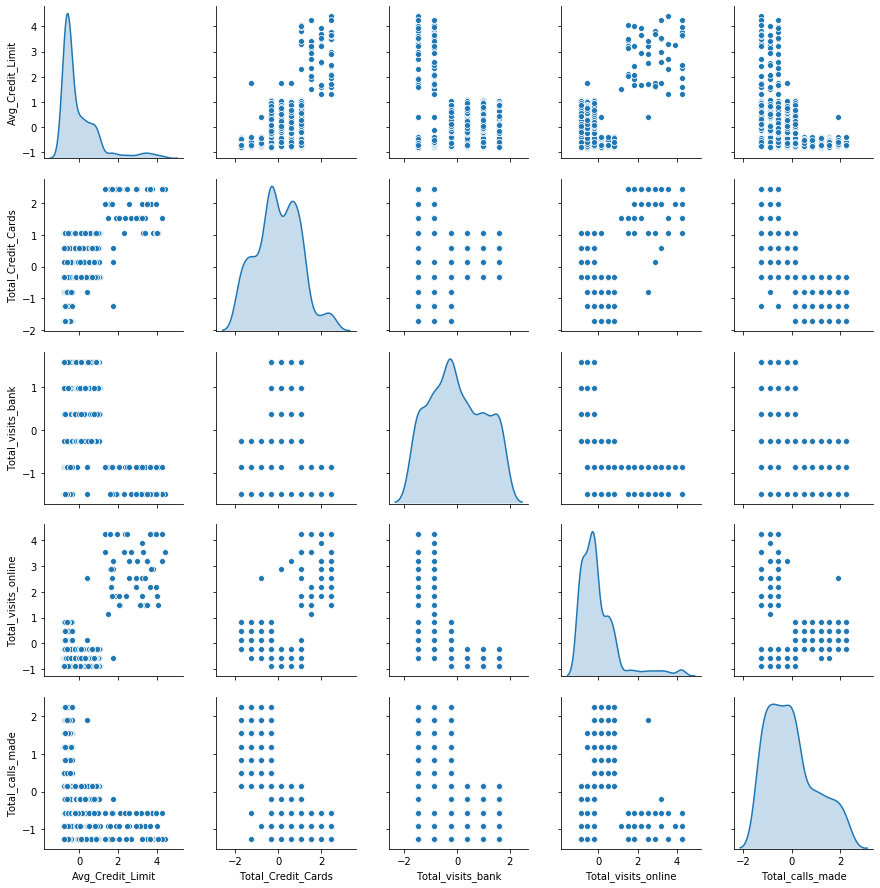

In [46]:
sns.pairplot(X_scaled, diag_kind="kde")

In [48]:
# The Bidimentional plots and the Histograms(kde) show VERY DISTINCT clusterisation in the data.
        

## 3- KMeans method of clusterisation

In [30]:
# Libraries for this Stage 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

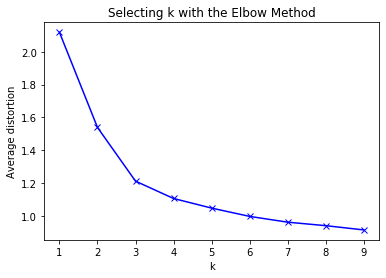

In [49]:
# for loop creating the Elbow method to find the optimal number of clusters
clusters = range (1, 10)
meanDistortions = []

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_scaled)
    prediction = model.predict(X_scaled)
    meanDistortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / CC_df_trimmed.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')





In [32]:
# The BEND is very clear at K=3  

### KMeans with  3 clusters

In [52]:
# Let us first start with K = 3

final_model= KMeans(3)
final_model.fit(X_scaled)
prediction=final_model.predict(X_scaled)

#Append the prediction 
X_scaled["GROUP"] = prediction
X["GROUP"] = prediction

print("Groups Assigned : \n")
X.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,2
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,0


In [58]:
X_clustered = X.groupby(['GROUP'])
X_clustered.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a277f6e10>,
      dtype=object)

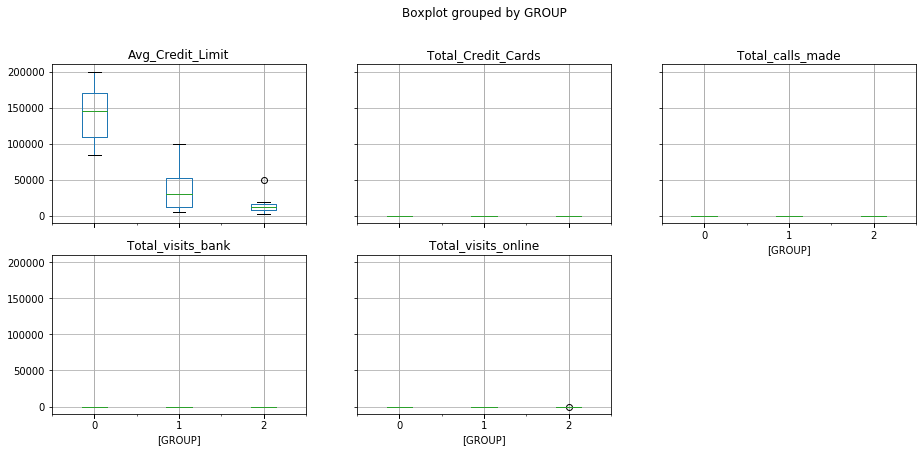

In [63]:
X.boxplot(by ='GROUP' , layout=(3,3) , figsize= (15 ,10))

# CLUSTERS are ONLY visible in Avg_Credit_Limit !!?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26efc3d0>,
      dtype=object)

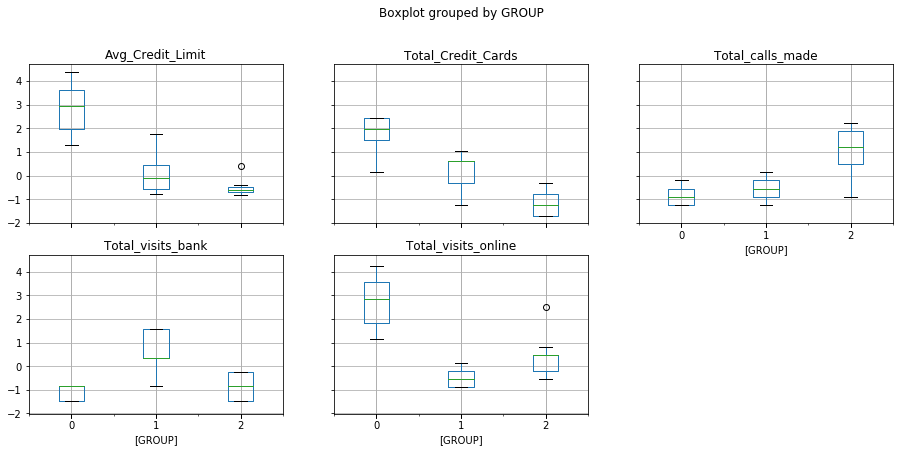

In [62]:
# repeating the same but on the SCALED data
X_scaled.boxplot(by ='GROUP' , layout=(3,3) , figsize= (15 ,10))

# CLUSTERS are more visible now  :-)

In [70]:
X.groupby(["GROUP"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,LABELS
GROUP,,,,,,
0,50,50,50,50,50,50
1,386,386,386,386,386,386
2,224,224,224,224,224,224


In [64]:
# OBSERVATIONS :

# GROUP 0: Highest: Avg_Credit_Limit, Total_credit_cards, Total_visits_online
#          Lowest : Total_visits_bank , Total_calls_made

# GROUP 1: Highest: Total_visits_bank
#          Lowest : Total_visits_online

# GROUP 2: Highest: Total_calls_made
#          Lowest : Avg_Credit_Limit, Total_credit_cards

## 4- Hierarchical clustering

In [73]:
# Library needed at this stage 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [74]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [75]:
model.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [76]:
X['LABELS'] = model.labels_
X.head(10)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,LABELS
0,100000,2,1,1,0,1,0
1,50000,3,0,10,9,2,2
2,50000,7,1,3,4,1,0
3,30000,5,1,1,4,1,0
4,100000,6,0,12,3,0,1
5,20000,3,0,1,8,2,2
6,100000,5,0,11,2,0,1
7,15000,3,0,1,1,2,2
8,5000,2,0,2,2,2,2
9,3000,4,0,1,7,2,2


In [77]:
X.groupby(["LABELS"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
LABELS,,,,,,
0,386,386,386,386,386,386
1,50,50,50,50,50,50
2,224,224,224,224,224,224


In [78]:
X.groupby(["GROUP"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,LABELS
GROUP,,,,,,
0,50,50,50,50,50,50
1,386,386,386,386,386,386
2,224,224,224,224,224,224


In [79]:
# OBSERVATION :  Similar clusterisations whether with Kmeans or Hierarchichal
# LABEL 0 = GROUP 1
# LABEL 1 = GROUP 0
# LABEL 2 = GROUP 2

In [85]:
# cophenet index is a measure of the correlation between :
# the distance of points in feature space and distance on dendrogram
# The closer it is to 1, the better is the clustering

Z = linkage(X_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(X_scaled))

c

0.9102691112621796

In [86]:
# WOW ! high cophenetic Index!

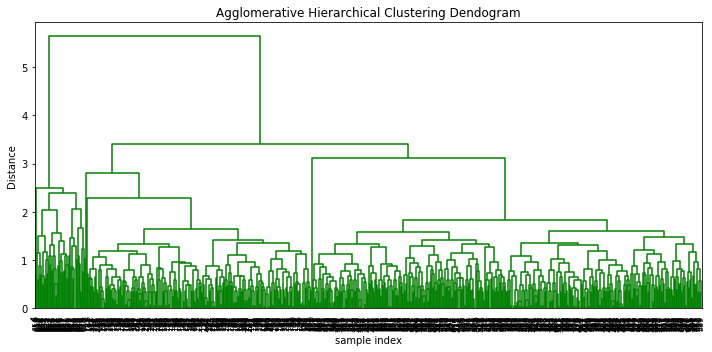

In [87]:
# Dendogram 
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [90]:
# The Deddogram was computationally HEAVY . 
# At a distnce of  4          : we have 2 clusters.
# At a distance of around 3.3 : we have 3 Clusters
# At a distnce of  3          : we have 4 clusters.

#etc ...

Edouard Toutounji - April 3 , 2020